In [ ]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data3size5.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),3),to_categorical((np.array(y_val)),3),to_categorical((np.array(y_test)),3)

In [4]:
#モデルの設定
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
   optimizer = 'adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
591/591 [==============================] - 35s 59ms/step - loss: 0.8163 - accuracy: 0.6492 - val_loss: 0.7041 - val_accuracy: 0.7253
Epoch 2/20
591/591 [==============================] - 33s 55ms/step - loss: 0.7117 - accuracy: 0.7187 - val_loss: 0.6974 - val_accuracy: 0.7216
Epoch 3/20
591/591 [==============================] - 33s 56ms/step - loss: 0.6742 - accuracy: 0.7284 - val_loss: 0.6373 - val_accuracy: 0.7462
Epoch 4/20
591/591 [==============================] - 33s 55ms/step - loss: 0.6277 - accuracy: 0.7428 - val_loss: 0.5937 - val_accuracy: 0.7551
Epoch 5/20
591/591 [==============================] - 33s 55ms/step - loss: 0.6027 - accuracy: 0.7500 - val_loss: 0.5829 - val_accuracy: 0.7605
Epoch 6/20
591/591 [==============================] - 32s 54ms/step - loss: 0.5848 - accuracy: 0.7584 - val_loss: 0.5854 - val_accuracy: 0.7613
Epoch 7/20
591/591 [==============================] - 32s 55ms/step - loss: 0.5617 - accuracy: 0.7677 - val_loss: 0.5771 - val_accuracy:

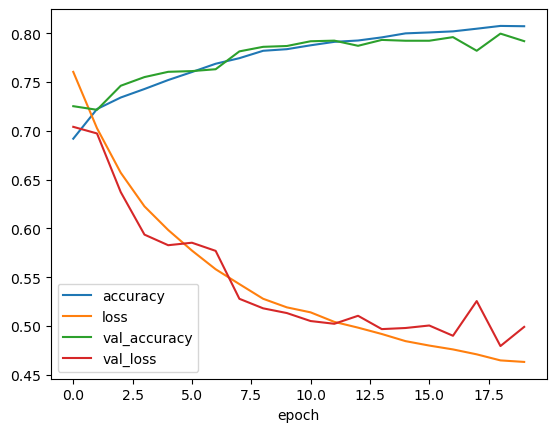

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
print(type(history))
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<class 'tensorflow.python.keras.callbacks.History'>
Test loss: 0.5151278972625732
Test accuracy: 0.7822913527488708


In [8]:
pd.DataFrame(history.history["loss"])

,0
0,0.766594
1,0.710117
2,0.683892
3,0.653313
4,0.633217
5,0.618311
6,0.604881
7,0.585901
8,0.573411
9,0.561822
